In [1]:
import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt

In [2]:
# Q1
ground_truth = norm.cdf(-4)

n = 10000
MC_sampling = np.sum(np.where(np.random.randn(n)>4, 1, 0)) / n
IS_normal = 0
for i in range(n):
    sample = np.random.normal(6, 1)
    if sample > 4:
        IS_normal += norm.pdf(sample) / norm.pdf(sample, loc=6, scale=1)
IS_normal /= n
print("Ground truth probability:", ground_truth)
print("Monte Carlo estimate:", MC_sampling)
print("Importance sampling estimate:", IS_normal)

Ground truth probability: 3.167124183311986e-05
Monte Carlo estimate: 0.0
Importance sampling estimate: 3.508438529551192e-05


In [3]:
IS_exp = 0
sample = np.random.exponential(size=n) + 4
IS_exp = np.sum(norm.pdf(sample) / expon.pdf(sample-4)) / n
print("IS normal relative error:", np.abs(ground_truth-IS_normal)/ground_truth)
print("IS exp relative error:", np.abs(ground_truth-IS_exp)/ground_truth)

IS normal relative error: 0.10776790756663024
IS exp relative error: 0.003936181646361617


In [4]:
# sol
xx = np.linspace(4, 20 , 100000)

def p(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def q(x, mu , sigma):
    return np.exp(-(x-mu)**2/(2*sigma **2))/(np.sqrt(2*np.pi)*sigma)

def w(x, mu , sigma):
    return p(x)/q(x, mu , sigma)

I = np.trapz(p(xx), xx) # Numerical computation of the integral

print('Integral of p(x) from 4 to infinity: ', I)

N = 10000

x = np.random.normal(0, 1, N) # iid samples from p(x)

I_est_MC = (1/N) * np.sum(x > 4)
print('Monte Carlo estimate: ', I_est_MC)

mu = 6
sigma = 1

x_s = np.zeros(N)
weights = np.zeros(N)

for i in range(N):
    x_s[i] = np.random.normal(mu , sigma , 1)
    weights[i] = w(x_s[i], mu , sigma)

I_est_IS = (1/N) * np.sum(weights * (x_s > 4))
print('Importance sampling estimate: ', I_est_IS)


Integral of p(x) from 4 to infinity:  3.16712429751607e-05
Monte Carlo estimate:  0.0
Importance sampling estimate:  3.332160897841322e-05


In [5]:
# Q3
MC_mean = np.sum(np.random.randn(n)) / n
sample = np.random.normal(0, 2, n)
IS_mean = np.sum(sample * norm.pdf(sample) / norm.pdf(sample, loc=0, scale=2)) / n
print("MC absolute error:", np.abs(MC_mean))
print("IS absolute error:", np.abs(IS_mean))

MC absolute error: 0.007405881982658313
IS absolute error: 0.0066908469729426755


In [6]:
MC_list = []
IS_list = []
m = 5000
for i in range(m):
    MC_mean = np.sum(np.random.randn(n)) / n
    MC_list.append(MC_mean)
    sample = np.random.normal(0, 2, n)
    IS_mean = np.sum(sample * norm.pdf(sample) / norm.pdf(sample, loc=0, scale=2)) / n
    IS_list.append(IS_mean)
MC_var = np.var(MC_list)
IS_var = np.var(IS_list)
print("MC variance:", MC_var)
print("IS variance:", IS_var)
print("Absolute error for variance ratio:", np.abs(np.exp(np.log(IS_var)-np.log(MC_var))-np.sqrt(16/27)))

MC variance: 0.00010249717874061858
IS variance: 8.725388800071841e-05
Absolute error for variance ratio: 0.08148051605487128


MC variance:  0.09000772547976865
IS variance:  0.07160794243564648
Theoretical variance:  0.07698003589195011
MC mean:  -0.008396143330673636
IS mean:  0.023172151838527087


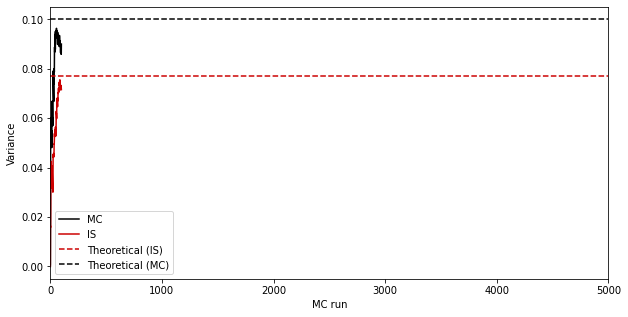

MC variance:  0.08912337965128295
IS variance:  0.0739776820973678
Theoretical variance:  0.07698003589195011
MC mean:  -0.006875568197744162
IS mean:  0.00021099075549118273
MC variance:  0.08825595438242302
IS variance:  0.0777408276595707
Theoretical variance:  0.07698003589195011
MC mean:  0.003428031223412228
IS mean:  -0.014498105756470994
MC variance:  0.09221263152538409
IS variance:  0.08093777895776932
Theoretical variance:  0.07698003589195011
MC mean:  0.002046477138486493
IS mean:  -0.008015959997592364
MC variance:  0.09215211403489108
IS variance:  0.07903523687389372
Theoretical variance:  0.07698003589195011
MC mean:  -0.011083264776295195
IS mean:  -0.008213048229162748
MC variance:  0.09317818812567022
IS variance:  0.07857882165615822
Theoretical variance:  0.07698003589195011
MC mean:  -0.012844309785573892
IS mean:  -0.005101933336538343
MC variance:  0.09398216811108824
IS variance:  0.07766179951155568
Theoretical variance:  0.07698003589195011
MC mean:  -0.0199

In [7]:
# sol
def p(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
def q(x, lam):
    return 1/np.sqrt(2*np.pi * 1/lam) * np.exp(-x**2/(2/lam))
lam = 1/2 
N = 10
I_MC = np.array([]) 
I_IS = np.array([]) 
var_MC = np.array([]) 
var_IS = np.array([])
var_th = (1/N) * (2 - lam)**(-3/2) * lam**(-1/2) 
MC = 5000
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(MC):
    x = np.random.normal(0, 1, N)
    I_MC = np.append(I_MC, np.mean(x))
    x_s = np.sqrt(1/lam) * np.random.normal(0, 1, N)
    weights = p(x_s) / q(x_s, lam)
    I_IS = np.append(I_IS, (1/N) * np.sum(weights * x_s))
    var_MC = np.append(var_MC, np.var(I_MC))
    var_IS = np.append(var_IS, np.var(I_IS))
    if (i+1) % 100 == 0:
        print('MC variance: ', var_MC[-1]) 
        print('IS variance: ', var_IS[-1]) 
        print('Theoretical variance: ', var_th) 
        print('MC mean: ', np.mean(I_MC)) 
        print('IS mean: ', np.mean(I_IS))
        ax.cla()
        ax.plot(var_MC, label='MC', color='k')
        ax.plot(var_IS, label='IS', color=[0.8, 0, 0])
        ax.plot([0, MC], [var_th, var_th], '--', label='Theoretical (IS)', color=[0.8, 0, 0]) 
        ax.plot([0, MC], [1/N, 1/N], 'k--', label='Theoretical (MC)')
        ax.set_xlim([0, MC]) 
        ax.set_xlabel('MC run') 
        ax.set_ylabel('Variance') 
        ax.legend() 
        plt.show(block=False) 
        plt.pause(0.01)

print('MC variance: ', var_MC[-1]) 
print('IS variance: ', var_IS[-1]) 
print('Theoretical variance: ', var_th) 
print('MC mean: ', np.mean(I_MC))
print('IS mean: ', np.mean(I_IS)) 
ax.cla()
ax.plot(var_MC, label='MC', color='k')
ax.plot(var_IS, label='IS', color=[0.8, 0, 0])
ax.plot([0, MC], [var_th, var_th], '--', label='Theoretical (IS)',
color=[0.8, 0, 0])
ax.plot([0, MC], [1/N, 1/N], 'k--', label='Theoretical (MC)') 
ax.set_xlim([0, MC])
ax.set_xlabel('MC run')
ax.set_ylabel('Variance')
ax.legend() 
plt.show()


In [8]:
# Q5
log_w = np.array([1000 , 1001 , 999 , 1002 , 950])
naive_w = np.exp(log_w) / np.sum(np.exp(log_w))

max_w = np.max(log_w)
modified_log_w = log_w - max_w
modified_w = np.exp(modified_log_w) / np.sum(np.exp(modified_log_w))
print("naive normalisation procedure:", naive_w)
print("stable normalisation procedure:", modified_w)

naive normalisation procedure: [nan nan nan nan nan]
stable normalisation procedure: [8.71443187e-02 2.36882818e-01 3.20586033e-02 6.43914260e-01
 1.68079592e-23]


C:\Users\Besty\AppData\Local\Temp\ipykernel_62968\3819161467.py:3: RuntimeWarning: overflow encountered in exp
  naive_w = np.exp(log_w) / np.sum(np.exp(log_w))
C:\Users\Besty\AppData\Local\Temp\ipykernel_62968\3819161467.py:3: RuntimeWarning: invalid value encountered in true_divide
  naive_w = np.exp(log_w) / np.sum(np.exp(log_w))


In [9]:
# sol
logw = [1000 , 1001 , 999 , 1002 , 950]

w = np.exp(logw)/np.sum(np.exp(logw))
w2 = np.exp(logw - np.max(logw))/np.sum(np.exp(logw - np.max(logw)))

print(w)
print(w2)

[nan nan nan nan nan]
[8.71443187e-02 2.36882818e-01 3.20586033e-02 6.43914260e-01
 1.68079592e-23]


C:\Users\Besty\AppData\Local\Temp\ipykernel_62968\3865504303.py:4: RuntimeWarning: overflow encountered in exp
  w = np.exp(logw)/np.sum(np.exp(logw))
C:\Users\Besty\AppData\Local\Temp\ipykernel_62968\3865504303.py:4: RuntimeWarning: invalid value encountered in true_divide
  w = np.exp(logw)/np.sum(np.exp(logw))
